## 第一题

In [176]:
import numpy as np

# 定义初始参数
eta = 1  # 固定步长
a = np.array([0, 1, 0])  # 初始权向量 a
samples = np.array([
    [1, 4, 1],   # 第一类样本1
    [2, 3, 1],   # 第一类样本2
    [-4, -1, -1],  # 第二类样本1，负号表示负类
    [-3, -2, -1]   # 第二类样本2，负号表示负类
])

# 批处理感知机算法
def batch_perceptron(samples, a, eta):
    while True:
        # 计算每个样本的分类结果
        misclassified_samples = []
        for y in samples:
            if np.dot(a, y) <= 0:  # 误分类的样本
                misclassified_samples.append(y)

        # 如果没有误分类样本，则终止
        if not misclassified_samples:
            break   
        print(a)
        # 累积误分类样本向量
        delta_a = np.sum(misclassified_samples, axis=0)

        # 更新权向量
        a = a + eta * delta_a

        # 输出当前权向量
        print("Updated weight vector a:", a)

    return a

# 运行批处理感知机算法
final_a = batch_perceptron(samples, a, eta)
print("Final weight vector a:", final_a)


[0 1 0]
Updated weight vector a: [-7 -2 -2]
[-7 -2 -2]
Updated weight vector a: [-4  5  0]
Final weight vector a: [-4  5  0]


## 第二题

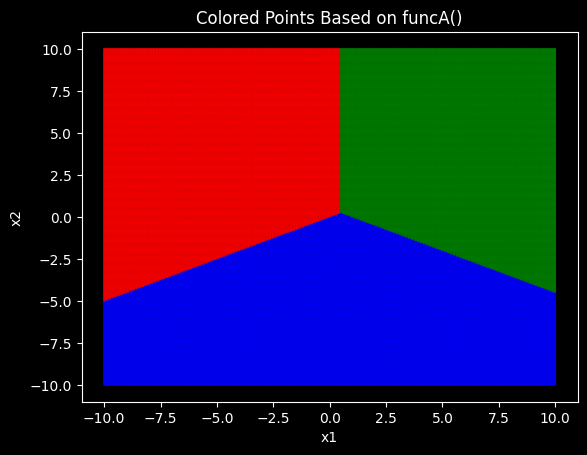

In [177]:
import matplotlib.pyplot as plt
import numpy as np


# 定义 funcA 函数，根据坐标返回颜色
def funcA(x, y):
    # 示例逻辑：如果 x + y > 0，则返回 "red"，否则返回 "blue"
    f1, f2, f3 = -x + y, x + y - 1, -y
    if f1 > f2 and f1 > f3:
        return "red"
    elif f2 > f3:
        return "green"
    else:
        return "blue"
   
# 定义点坐标
x1 = np.linspace(-10, 10, 300)
x2 = np.linspace(-10, 10, 300)
x1, x2 = np.meshgrid(x1, x2)
points = np.c_[x1.ravel(), x2.ravel()]

# 为每个点计算颜色
colors = [funcA(x, y) for x, y in points]

# 绘制散点图
plt.scatter(points[:,0], points[:,1], c=colors, s=0.2)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Colored Points Based on funcA()")
plt.show()

## 第一部分

In [178]:
import numpy as np

s1 = np.array([
    [0.1, 1.1], [6.8, 7.1], [-3.5, -4.1], [2.0, 2.7], [4.1, 2.8],
    [3.1, 5.0], [-0.8, -1.3], [0.9, 1.2], [5.0, 6.4], [3.9, 4.0], ])
s2 = np.array([
    [7.1, 4.2], [-1.4, -4.3], [4.5, 0.0], [6.3, 1.6], [4.2, 1.9],
    [1.4, -3.2], [2.4, -4.0], [2.5, -6.1], [8.4, 3.7], [4.1, -2.2], ])
s3 = np.array([
    [-3.0, -2.9], [0.5, 8.7], [2.9, 2.1], [-0.1, 5.2], [-4.0, 2.2],
    [-1.3, 3.7], [-3.4, 6.2], [-4.1, 3.4], [-5.1, 1.6], [1.9, 5.1], ])
s4 = np.array([
    [-2.0, -8.4], [-8.9, 0.2], [-4.2, -7.7], [-8.5, -3.2], [-6.7, -4.0],
    [-0.5, -9.2], [-5.3, -6.7], [-8.7, -6.4], [-7.1, -9.7], [-8.0, -6.3], ])

def draw(a, b, c):
    # 绘制二维点图，用不同颜色的X表示各点集
    plt.figure(figsize=(8, 8))
    plt.scatter(s1[:, 0], s1[:, 1], color='red', marker='x', label='s1')
    plt.scatter(s2[:, 0], s2[:, 1], color='blue', marker='x', label='s2')
    plt.scatter(s3[:, 0], s3[:, 1], color='green', marker='x', label='s3')
    plt.scatter(s4[:, 0], s4[:, 1], color='purple', marker='x', label='s4')
    X = np.arange(-10, 10, 0.1)
    if b != 0 :
        Y = -(a*X+c)/b
    else :
        Y = np.arrange(-10, 10, 0.1)
        X = -(b*Y+c)/a
    # 图例和标题
    plt.plot(X, Y, color="yellow", label="line")
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('2D Scatter Plot of Points Sets s1, s2, s3, and s4')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()
    

23  : Updated weight vector a: [-30.4  34.1  34. ]


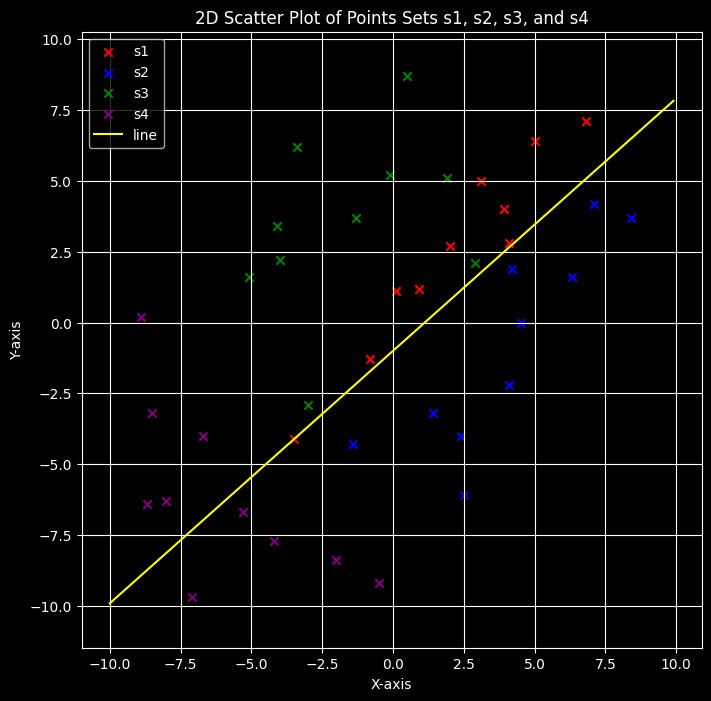

39  : Updated weight vector a: [ 5.1  5.2 31. ]


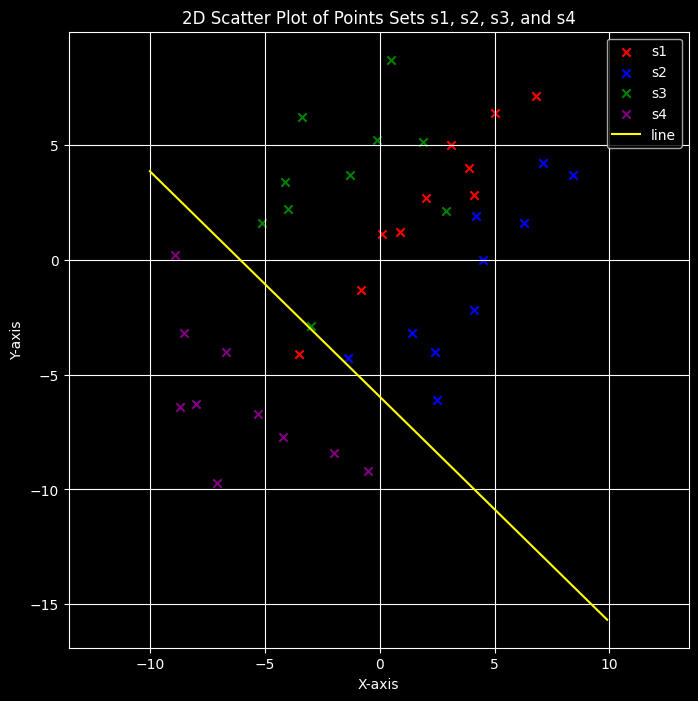

In [179]:

samples = np.vstack((np.hstack((s1, np.ones((s1.shape[0], 1)))), 
                             np.hstack((-s2, -np.ones((s2.shape[0], 1))))))
samples2 =  np.vstack((np.hstack((s3, np.ones((s3.shape[0], 1)))), 
                             np.hstack((-s4, -np.ones((s4.shape[0], 1))))))

np.set_printoptions(precision=2)

# 批处理感知机算法
def batch_perceptron(samples):
    n = 0
    # 定义初始参数
    eta = 1  # 固定步长
    a = np.array([0, 0, 0])  # 初始权向量 a
    while True:
        # 计算每个样本的分类结果
        misclassified_samples = []
        for y in samples:
            if np.dot(a, y) <= 0:  # 误分类的样本
                misclassified_samples.append(y)
        
        delta_a = np.sum(misclassified_samples, axis=0)


        if not misclassified_samples:
            break
        a = a + eta * delta_a
        n += 1
    return n, a

# 运行批处理感知机算法
n, final_a = batch_perceptron(samples)
print(n, " : Updated weight vector a:", final_a)
draw(final_a[0], final_a[1], final_a[2])
n, final_a = batch_perceptron(samples2)
print(n, " : Updated weight vector a:", final_a)
draw(final_a[0], final_a[1], final_a[2])




## 第二部分

未在最大迭代次数内收敛
正确个数18 | 错误率 0.09999999999999998
[[ 0.35]
 [-0.25]
 [ 0.48]]


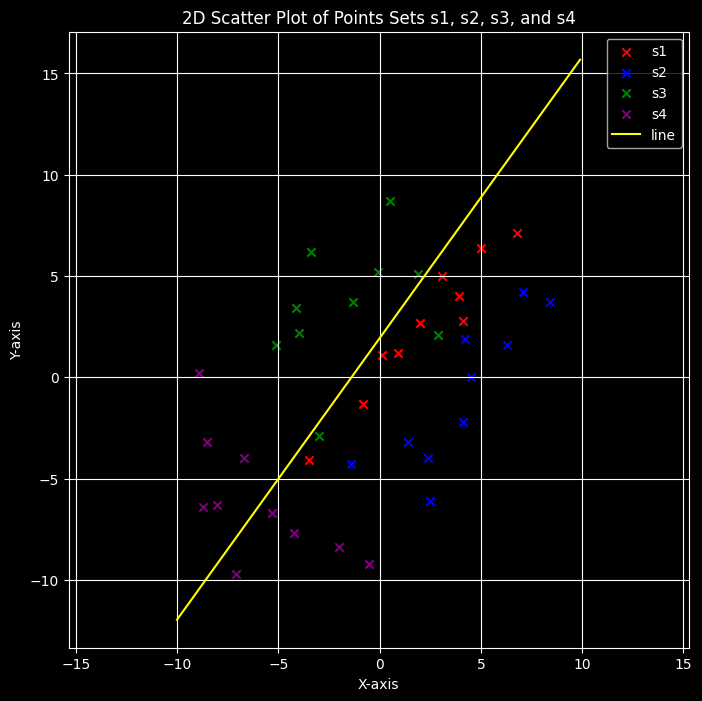

收敛在第 12919 次迭代
20
正确个数20 | 错误率 0.0
[[0.57]
 [0.51]
 [4.01]]


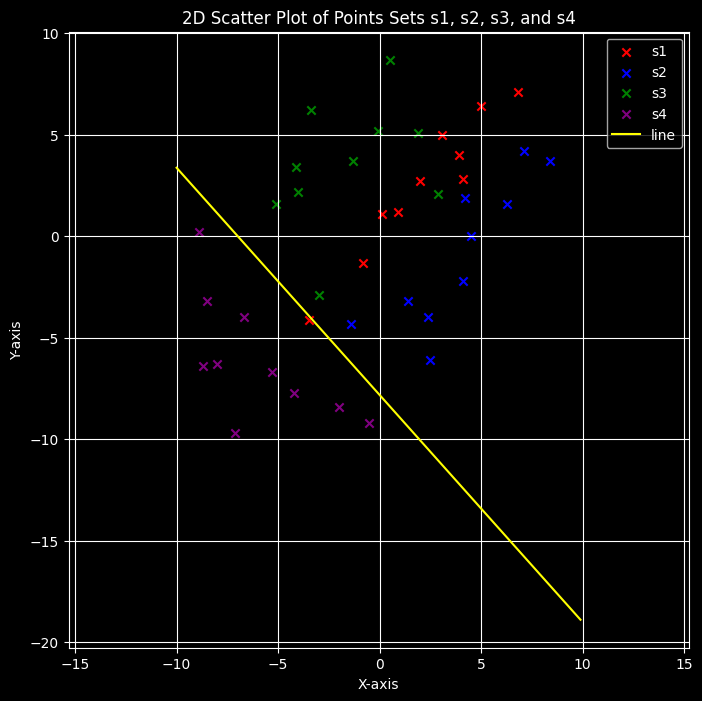

In [182]:
samples = np.vstack((np.hstack((s1, np.ones((s1.shape[0], 1)))), 
                             np.hstack((-s3, -np.ones((s3.shape[0], 1))))))
samples2 =  np.vstack((np.hstack((s2, np.ones((s2.shape[0], 1)))), 
                             np.hstack((-s4, -np.ones((s4.shape[0], 1))))))

def ho_kashyap(samples, max_iter=20000, eta=0.1, b_min=1e-5):
    Y = np.matrix(samples)
    a = np.full((Y.shape[1], 1), 0.1)  # 初始化权向量 a
    b = np.full((Y.shape[0], 1), 1)   # 初始化 b 向量

    for iteration in range(max_iter):
        e = Y @ a - b
        e_plus = 0.5 * (e + np.abs(e))  # e 的正部分
        b = b + 2* eta * e_plus            # 更新 b
        a = np.linalg.pinv(Y) @ b       # 最小二乘更新 a
        # 检查是否收敛
        if np.sum(np.abs(e)) <= b_min:
            print(f"收敛在第 {iteration+1} 次迭代")
            print(np.sum(b > 0))
            break
    else:
        print("未在最大迭代次数内收敛")
    f = np.sum(Y @ a > 0)
    print(f"正确个数{f} | 错误率 {1-f/len(samples)}")
    return a
final_a = ho_kashyap(samples)
print(final_a)
draw(final_a[0, 0], final_a[1, 0], final_a[2, 0])
final_a = ho_kashyap(samples2)
print(final_a)
draw(final_a[0, 0], final_a[1, 0], final_a[2, 0])


## 第三部分

In [181]:
samples = np.vstack((   np.hstack((s1[:8, :], np.ones((8, 1)))), 
                        np.hstack((s2[:8, :], np.ones((8, 1)))),
                        np.hstack((s3[:8, :], np.ones((8, 1)))), 
                        np.hstack((s4[:8, :], np.ones((8, 1)))), ))

samples2 = np.vstack((  np.hstack((s1[8:, :], np.ones((2, 1)))), 
                        np.hstack((s2[8:, :], np.ones((2, 1)))),
                        np.hstack((s3[8:, :], np.ones((2, 1)))), 
                        np.hstack((s4[8:, :], np.ones((2, 1)))), ))

Z = np.full((4, 32), 0)
for i in range(0, 32):
    Z[int(i/8), i] = 1

W = np.linalg.pinv(samples) @ Z.T

b = np.argmax(W.T @ samples2.T, axis=0)
print(b)

## 正确率 百分百。

[0 0 1 1 2 2 3 3]
